<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.403 · Programació per a la ciència de dades</p>
    <p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programació per a la ciència de dades
============================

--- 

Unitat 5: Optimització de codi: programació concurrent i paral·lela
-----------------------------------------------------

---

### Instruccions d'ús

Aquest document és un notebook interactiu que intercala explicacions més aviat teòriques de conceptes de programació amb fragments de codi executables. Per aprofitar els avantatges que aporta aquest format, us recomanem que, en primer lloc, llegiu les explicacions i el codi que us proporcionem. D'aquesta manera tindreu un primer contacte amb els conceptes que hi exposem. Ara bé, **la lectura és només el principi!** Una vegada hagueu llegit el contingut proporcionat, no oblideu executar el codi proporcionat i modificar-lo per crear-ne variants, que us permetin comprovar que heu entès la seva funcionalitat i explorar-ne els detalls d'implementació. Per últim, us recomanem també consultar la documentació enllaçada per explorar amb més profunditat les funcionalitats dels mòduls presentats. 



In [1]:
# %load_ext pycodestyle_magic

In [2]:
# %pycodestyle_on

### Introducció

En aquesta unitat veurem com podem optimitzar els programes en Python, programant-ne versions que aprofitin la concurrència dels processadors i/o el paral·lelisme que ofereixen les arquitectures actuals. Això ens permetrà, dissenyar i implementar codi que aprofiti els recursos disponibles a la nostra màquina per a realitzar la tasca per la qual ha estat dissenyat.

En primer lloc, presentarem els conceptes bàsics de concurrència i paral·lelisme, i farem una petita descripció dels *threads* i els processos.

Seguidament, s'explica com podem implementar codi *multithreaded* en Python, i quan serà beneficiós fer-ho. Veurem també quins problemes es poden produir de l'execució amb múltiples fils, i algunes de les eines que ens ofereix Python per a evitar-los.

Després ens centrarem en la creació de programes multiprocés. De nou, explicarem en quines situacions pot ser útil que un programa sigui multiprocés, veurem com implementar aquest tipus de programes des de Python, i detallarem algunes alternatives per a comunicar diferents processos.

A continuació s'inclou la taula de continguts, que podeu fer servir per a navegar pel document:

<ul style="list-style-type:none">
    <li><a href='#1.--Introducció'>1. Introducció</a></li>
    <li><a href="#2.--Ús-de-múltiples-threads-en-Python">2. Ús de múltiples threads en Python</a></li> 
    <ul style="list-style-type:none">
        <li><a href='#2.1.--Introducció'> 2.1. Introducció</a></li>
        <li><a href="#2.2.--Optimització-de-codi-fent-servir-threads-en-Python">2.2. Optimització de codi fent servir threads en Python</a></li>
        <li><a href="#2.3.--Interferències-entre-threads">2.3. Interferències entre threads</a></li>        
        <ul style="list-style-type:none">
            <li><a href='#2.3.1.--Deadlocks'>2.3.1. Deadlocks</a></li>
        </ul>
    </ul>
    <li><a href="#3.--Ús-de-múltiples-processos-en-Python">3. Ús de múltiples processos en Python</a></li>
    <ul style="list-style-type:none">
        <li><a href="#3.1.--Introducció">3.1. Introducció</a></li>
        <li><a href="#3.2.--Optimització-de-codi-fent-servir-multiprocés-en-Python">3.2. Optimització de codi fent servir multiprocés en Python</a></li>
        <li><a href="#3.3.--Compartició-de-dades-i-coordinació-de-processos">3.3. Compartició de dades i coordinació de processos</a></li>
        <ul style="list-style-type:none">
            <li><a href='#3.3.1.--Variables-compartides'>3.3.1. Variables compartides</a></li>
            <li><a href='#3.3.2.--Comunicació-entre-processos'>3.3.2. Comunicació entre processos</a></li>
        </ul>
    </ul>
    <li><a href='#4.--Exercicis-per-practicar'>4. Exercicis per practicar</a></li>
    <ul style="list-style-type:none">
        <li><a href='#4.1.--Solucions-als-exercicis-per-practicar'>4.1. Solucions als exercicis per practicar</a></li>
    </ul>
    <li><a href='#5.--Bibliografia'>5. Bibliografia</a></li>
    <ul style="list-style-type:none">
        <li><a href='#5.1.--Bibliografia-bàsica'>5.1. Bibliografia bàsica</a></li>
        <li><a href='#5.2.--Bibliografia-addicional---Ampliació-de-coneixements'>5.2. Bibliografia addicional</a></li>
    </ul>
</ul>

**Important**: 

**Nota 1:** Abans d'executar el codi d'aquest notebook, cal instal·lar una llibreria addicional. Per instal·lar llibreries en Python, farem servir `pip`, l'instal·lador de paquets de Python. 

Obriu ara una consola i executeu la següent instrucció, que instal·la el paquet `sympy`:

```
sudo pip3 install sympy
```

Només cal realitzar aquest pas **una única vegada**. Una vegada tingueu instal·lada la llibreria, podreu executar la totalitat del notebook a la màquina on hagueu fet la instal·lació.

# 1.- Introducció

Fins ara hem creat programes que s'executen **seqüencialment**: seguint el flux d'execució definit pel codi, les instruccions s'executaven sempre una darrera de l'altra, esperant a que finalitzi cada instrucció per a començar a executar la següent. Ara bé, d'una banda, la majoria d'ordinadors moderns disposen de diverses CPUs, que permeten executar diversos fluxos d'execució alhora. D'altra banda, tot i només disposar d'una única CPU, a vegades serà més eficient anar intercalant l'execució de diversos fils, en comptes d'anar esperant a que finalitzi cadascun d'ells per a executar-ne el següent. N'és el cas, per exemple, de fils d'execució que esperen events externs: mentre un dels fils es troba esperant l'event extern, un segon fil pot aprofitar la CPU per fer càlculs. 

Així, en aquest *notebook* descriurem com podem realitzar programació **concurrent** (on diverses tasques poden avançar simultàniament, sense necessitat d'esperar a que en finalitzi una per iniciar la següent) i programació **paral·lela** (on diverses tasques s'executen alhora) en Python. La imatge següent mostra el concepte clau que distingeix la programació seqüencial, la concurrent i la paral·lela:

![concurrencia](img/concurrencia_cat.png)


A continuació descriurem com es pot implementar la concurrència i el paral·lelisme en Python fent servir *threads* i processos.

Un **procés** és un programa que s'ha carregat en memòria per a la seva execució, juntament amb els recursos que necessita per a executar-se. Aquests recursos contenen els registres (que poden contenir una instrucció, una adreça, una dada, etc.); el comptador de programa (un registre especial que emmagatzema un punter a la instrucció que s'està executant); i la pila i el *heap* (amb el fil de crides que han anat succeint i les variables que s'han anat creant).

Un **fil d'execució** o _**thread**_ és una unitat d'execució dins d'un procés. Un procés sempre té com a mínim un *thread*, i en pot tenir diversos.

Quan un procés es crea, se li assignen els recursos necessaris per a executar-se (entre els quals hi ha la memòria on s'emmagatzemen les variables). Així doncs, cada nou procés disposarà del seu espai de memòria (que s'assigna en el moment de la creació).

En canvi, la creació d'un nou *thread* en un procés no requereix de l'assignació de nous recursos: cada *thread* d'execució d'un procés compartirà la memòria ja assignada al procés on s'ha creat. Els *threads* sí que tindran algun recurs propi, però aquest serà mínim i es limitarà a les dades bàsiques que permetin mantenir l'execució (per exemple, tindran el seu propi comptador de programa que indiqui quina instrucció estan executant).

Això té dues implicacions clares. D'una banda, tant la creació de nous processos com els canvis de context entre processos són més costosos que entre *threads* (per l'*overhead* que es produeix a l'haver de gestionar la memòria). D'altra banda, els *threads* podran tenir problemes d'interferència al compartir espais de memòria, però serà fàcil passar dades d'un *thread* a un altre justament per aquesta compartició; en canvi, serà més costós comunicar processos entre ells, ja que diferents processos tindran espais de memòria diferents.

En aquesta introducció s'ha simplificat una mica el detall de com funciona la gestió de memòria en l'execució de programes, ja que no és l'objectiu principal d'aquest mòdul. Si esteu interessats en explorar en més detall què diferencia, a nivell de sistema operatiu, els *threads* dels processos, us recomanem que visiteu els enllaços següents ([1](https://www.youtube.com/watch?v=TRH2HupGkgI), [2](https://www.youtube.com/watch?v=PBb0NRvo96s), [3](https://www.youtube.com/watch?v=Dhf-DYO1K78), [4](https://www.youtube.com/watch?v=3WmNGc9qP0g), [5](https://www.youtube.com/watch?v=X668LfXObaM)).

# 2.- Ús de múltiples *threads* en Python

## 2.1.- Introducció

En aquesta secció veurem com podem implementar *threads* en Python fent servir el mòdul [`threading`](https://docs.python.org/3.8/library/threading.html). 

El mòdul [`threading`](https://docs.python.org/3.8/library/threading.html) implementa la classe [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread) que representa un flux d'execució que corre en un *thread* individual. Per tal de crear diversos fils d'execució dins del nostre programa, crearem doncs diferents instàncies de la classe [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), especificant quina funció han d'executar i amb quins paràmetres.

Una vegada creada la instància de [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), podem iniciar-ne la seva execució cridant el mètode [`start`](https://docs.python.org/3.8/library/threading.html#threading.Thread.start). Per tal de controlar la finalització dels diferents fils d'execució des del fil principal, farem servir el mètode [`join`](https://docs.python.org/3.8/library/threading.html#threading.Thread.join) de cada *thread*: aquest mètode bloqueja l'execució del fil on s'executa fins que finalitza el *thread* sobre el que s'ha cridat.

A continuació s'implementa un exemple senzill d'execució *multithreaded* amb el mòdul [`threading`](https://docs.python.org/3.8/library/threading.html). Definim una funció `random_wait` que espera un temps aleatori entre un i quatre segons, i que serà la funció que executaran els diferents fils. El codi principal crea tres instàncies de la classe [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), que executen la funció `random_wait`, i les inicia (amb `thread.start()`). Després, el fil principal espera a que finalitzin cadascun dels tres *threads*, cridant el mètode [`join`](https://docs.python.org/3.8/library/threading.html#threading.Thread.join) de cadascun d'ells.


In [3]:
from threading import Thread
from random import randint
from time import sleep
import logging
import sys


def random_wait(t_index):
    """
    Espera un temps aleatori entre 1 i 4 segons.
    """
    logging.info("[T{}]\tStarted".format(t_index))
    t = randint(1, 4)
    logging.info("[T{}]\tSleeping {} seconds...".format(t_index, t))
    sleep(t)
    logging.info("[T{}]\tEnd".format(t_index))
    

# Configura el logging
log_format = '[%(process)d]\t%(asctime)s %(levelname)s: %(message)s'
logging.basicConfig(format=log_format, level=logging.INFO, datefmt="%H:%M:%S", 
                    handlers=[logging.StreamHandler(sys.stdout)])

# Crea 3 threads que executen la funció random_wait i
# els inicia
threads = []
num_threads = 3
for i in range(num_threads):
    logging.info("[M]\tCreating thread {}".format(i))
    # Creem el thread
    thread = Thread(target=random_wait, args=(i,))
    threads.append(thread)
    # Executem el thread
    thread.start()

# Espera a que els 3 threads finalitzin
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[1754]	15:31:29 INFO: [M]	Creating thread 0
[1754]	15:31:29 INFO: [T0]	Started
[1754]	15:31:29 INFO: [M]	Creating thread 1
[1754]	15:31:29 INFO: [T0]	Sleeping 2 seconds...
[1754]	15:31:29 INFO: [T1]	Started
[1754]	15:31:29 INFO: [M]	Creating thread 2
[1754]	15:31:29 INFO: [T1]	Sleeping 4 seconds...
[1754]	15:31:29 INFO: [T2]	Started
[1754]	15:31:29 INFO: [M]	Waiting to join thread 0
[1754]	15:31:29 INFO: [T2]	Sleeping 1 seconds...
[1754]	15:31:30 INFO: [T2]	End
[1754]	15:31:31 INFO: [T0]	End
[1754]	15:31:31 INFO: [M]	Thread 0 joined!
[1754]	15:31:31 INFO: [M]	Waiting to join thread 1
[1754]	15:31:33 INFO: [T1]	End
[1754]	15:31:33 INFO: [M]	Thread 1 joined!
[1754]	15:31:33 INFO: [M]	Waiting to join thread 2
[1754]	15:31:33 INFO: [M]	Thread 2 joined!
[1754]	15:31:33 INFO: [M]	DONE!


En primer lloc, fixeu-vos que la funció `random_wait` rep un paràmetre que fem servir per identificar cadascun dels *threads*. Per facilitar el seguiment de l'execució, mostrem aquest identificador entre claudàtors cada vegada que mostrem un missatge de *log*.

En segon lloc, noteu com els diferents fils s'executen concurrentment: mentre el fil principal està creant el segon i tercer fils, el primer fil creat ja s'està executant. Noteu també com el primer fil a iniciar-se (`T0`) no té perquè ser el primer a finalitzar, ja que això dependrà de les esperes aleatòries que es produeixen en cada fil.

En tercer lloc, és interessant notar que no hem fet servir la instrucció `print` per a mostrar els missatges que informen de quina part del codi s'està executant, sinó que hem utilitzat el mòdul [`logging`](https://docs.python.org/3.8/library/logging.html). El principal motiu per fer-ho és assegurar que els diferents missatges es mostren sense interrupcions i amb el format desitjat, tot i que diferents fils d'execució estiguin escrivint-los. Addicionalment, fer servir [`logging`](https://docs.python.org/3.8/library/logging.html) ens ofereix altres funcionalitats, com ara el fet de mostrar informació addicional abans de cada missatge. En el cas del fragment de codi executat a la cel·la anterior, hem aprofitat per mostrar l'identificador del procés, l'hora, i el nivell del missatge. 

El mòdul [`logging`](https://docs.python.org/3.8/library/logging.html) té com a objectiu facilitar la creació de registres o *logs* en Python, ajudant així en el seguiment del flux d'execució dels programes. Els *logs* normalment contenen un registre dels events que han succeït i permeten seguir el comportament d'un programa, amb diverses finalitats. Així, per exemple, els *logs* poden servir per a ajudar en la detecció i depuració d'errors, per avaluar el rendiment d'un programa, per mostrar informació addicional sobre com o qui l'està utilitzant, etc. Aquest mòdul és, per tant, molt útil alhora de fer el seguiment de l'execució de codi concurrent. Si voleu explorar l'ús d'aquesta llibreria, us recomanem la lectura dels tutorials oficials (tant el [bàsic](https://docs.python.org/3/howto/logging.html#logging-basic-tutorial) com el més [avançat](https://docs.python.org/3/howto/logging.html#logging-advanced-tutorial)).

## 2.2.- Optimització de codi fent servir *threads* en Python

No tots els programes poden beneficiar-se de l'execució en múltiples *threads*. D'una banda, els programes que requereixen conèixer uns resultats anteriors per a calcular-ne els següents, difícilment s'executaran més ràpid en un entorn *multithreaded*, ja que els diferents fils no podran executar-se concurrentment. D'altra banda, en la seva versió més estesa, Python executa els diferents *threads* en un mateix processador, de manera que l'execució d'aquests és concurrent (però no paral·lela). Veiem-ho amb un parell d'exemples.

A la cel·la següent es defineix la funció `get_factors`, que donat un enter, en calcula la seva descomposició en factors primers i la retorna:

In [4]:
from sympy import primefactors


def get_factors(t_index, value):
    """
    Retorna la factorització de `value` en factors primers.
    """
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    r = primefactors(value)
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))

In [5]:
# Factoritzem el valor 15
get_factors(1, 15)

[1754]	15:31:33 INFO: [T1]	Started with input 15
[1754]	15:31:33 INFO: [T1]	Ended with output [3, 5]


Ara, calcularem la factorització de tres enters fent servir la funció `get_factors` de manera seqüencial:

In [6]:
nums_to_factor = [5215785878052641903952977068511001599, 
                  748283119772062608265951220534384001023, 
                  949273031776466197045163567568010291199]

In [7]:
%%time

for _, num in enumerate(nums_to_factor):
    get_factors(1, num)

[1754]	15:31:33 INFO: [T1]	Started with input 5215785878052641903952977068511001599
[1754]	15:31:34 INFO: [T1]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:31:34 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[1754]	15:31:39 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:31:39 INFO: [T1]	Started with input 949273031776466197045163567568010291199
[1754]	15:31:43 INFO: [T1]	Ended with output [87178291199, 10888869450418352160768000001]
CPU times: user 9.35 s, sys: 34.8 ms, total: 9.39 s
Wall time: 9.87 s


A continuació tornarem a repetir el càlcul de la factorització dels mateixos tres enters, executant-los ara com a *threads* independents:

In [8]:
%%time
threads = []

# Crea 3 threads que executen la funció get_factors i
# els inicia
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num))
    threads.append(thread)
    thread.start()

# Espera a que els 3 threads finalitzin
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[1754]	15:31:43 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[1754]	15:31:43 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[1754]	15:31:43 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[1754]	15:31:43 INFO: [M]	Waiting to join thread 0
[1754]	15:31:46 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:31:47 INFO: [M]	Thread 0 joined!
[1754]	15:31:47 INFO: [M]	Waiting to join thread 1
[1754]	15:31:53 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:31:53 INFO: [M]	Thread 1 joined!
[1754]	15:31:53 INFO: [M]	Waiting to join thread 2
[1754]	15:31:53 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[1754]	15:31:53 INFO: [M]	Thread 2 joined!
[1754]	15:31:53 INFO: [M]	DONE!
CPU times: user 9.42 s, sys: 9.44 ms, total: 9.43 s
Wall time: 9.91 s


Els temps d'execució de les dues versions del codi (la primera, seqüencial; i la segona, amb múltiples *threads*) és molt similar (i, sovint, la versió seqüencial resulta més ràpida). Això és així perquè els diferents *threads* s'executen en un mateix processador i tots ells executen codi que requereix temps de còmput de CPU. Per tant, la possible concurrència en l'execució no s'aprofita, i l'*overhead* que produeix la gestió dels *threads* impacta negativament en el rendiment del codi. Així doncs, aquest és un exemple clar d'un fragment de codi que **no** es beneficiarà d'una implementació amb múltiples fils d'execució en Python.

Veiem ara un segon exemple, en el qual crearem també tres *threads*: dos d'elles es descarregaran uns conjunts de dades d'Internet, i el tercer tornarà a factoritzar un dels números de l'exemple anterior.

En primer lloc, definim la funció `get_url_and_write_to_disk`, que descarrega el contingut d'una *url* i el desa al disc:

In [9]:
import requests

def get_url_and_write_to_disk(t_index, url):
    """
    Descarrega el contingut de la url i el desa a la carpeta `data`.
    """
    logging.info("[T{}]\tStarted with url {}".format(t_index, url))
    r = requests.get(url, allow_redirects=True)
    open('data/'+str(t_index), 'wb').write(r.content)
    logging.info("[T{}]\tEnd".format(t_index))

In [10]:
urls = ["https://snap.stanford.edu/data/twitter.tar.gz", 
        "https://snap.stanford.edu/data/twitter_combined.txt.gz"]

Ara, com a l'exemple anterior, executarem les tres tasques de manera seqüencial: primer, factoritzarem l'enter i, després, descarregarem els dos fitxers apuntats per les *urls* de la llista de la cel·la anterior:

In [12]:
%%time

get_factors(1, nums_to_factor[-1])

[1754]	15:33:50 INFO: [T1]	Started with input 949273031776466197045163567568010291199
[1754]	15:33:55 INFO: [T1]	Ended with output [87178291199, 10888869450418352160768000001]
CPU times: user 3.69 s, sys: 138 ms, total: 3.83 s
Wall time: 4.66 s


In [13]:
%%time

for url in urls:
    get_url_and_write_to_disk(1, url)

[1754]	15:33:55 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter.tar.gz
[1754]	15:33:59 INFO: [T1]	End
[1754]	15:33:59 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter_combined.txt.gz
[1754]	15:34:02 INFO: [T1]	End
CPU times: user 18.3 ms, sys: 1.3 s, total: 1.31 s
Wall time: 7.36 s


A continuació, implementem la versió *multithreaded* del codi anterior, tot creant tres *threads* (dos que descarregaran fitxers i un que farà el càlcul de la factorització).

In [14]:
%%time

# Creem els 3 threads que executen get_factors o get_url_and_write_to_disk
# i els iniciem
threads = []
for i in range(3):
    if i == 2:
        thread = Thread(target=get_factors, args=(i, nums_to_factor[-1]))
    else:
        thread = Thread(target=get_url_and_write_to_disk, args=(i, urls[i]))
        
    threads.append(thread)
    thread.start()

# Esperem a que els 3 threads finalitzin
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[1754]	15:34:04 INFO: [T0]	Started with url https://snap.stanford.edu/data/twitter.tar.gz
[1754]	15:34:04 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter_combined.txt.gz
[1754]	15:34:04 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[1754]	15:34:04 INFO: [M]	Waiting to join thread 0
[1754]	15:34:07 INFO: [T1]	End
[1754]	15:34:09 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[1754]	15:34:10 INFO: [T0]	End
[1754]	15:34:10 INFO: [M]	Thread 0 joined!
[1754]	15:34:10 INFO: [M]	Waiting to join thread 1
[1754]	15:34:10 INFO: [M]	Thread 1 joined!
[1754]	15:34:10 INFO: [M]	Waiting to join thread 2
[1754]	15:34:10 INFO: [M]	Thread 2 joined!
[1754]	15:34:10 INFO: [M]	DONE!
CPU times: user 2.77 s, sys: 1.97 s, total: 4.74 s
Wall time: 5.98 s


A diferència del primer exemple, ara sí que veiem una millora clara en el temps d'execució de la versió concurrent en relació a la versió seqüencial del nostre codi. En aquest cas, el fet que els tres *threads* no executin una tasca centrada en la CPU, sinó que dos d'ells descarreguen dades i les desen a disc, i el tercer sí que fa servir la CPU, fa que el temps d'execució global millori amb l'execució concurrent: tot el codi s'ha executat en una única CPU, però els temps d'espera produïts per les limitacions de la xarxa i l'escriptura a disc són aprofitats per a realitzar càlculs. 

## 2.3.- Interferències entre *threads*

Al crear instàncies de la classe [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread) que executen una funció (que es passa com a `target` al constructor de la classe), els diferents *threads* que s'executen concurrentment disposen d'una còpia pròpia de totes les variables locals de la funció que executen (per exemple, de la variable `r` de la funció `get_url_and_write_to_disk`; o de la variable `t` de la funció `random_wait`) però comparteixen les mateixes variables globals. 

El fet que diversos fils d'execució estiguin compartint les mateixes variables pot provocar interferències entre els diversos fils a l'hora de fer servir aquestes variables, interferències que poden causar comportaments indesitjats en els programes *multithreaded*.

Per veure un exemple dels problemes que es poden produir, recuperem el codi de la factorització concurrent d'una llista d'enters, i hi afegirem una variable global `factor_ctr` que comptarà quants números s'han factoritzat. La funció `get_factors` llegirà el valor de la variable, i la incrementarà quan hagi finalitzat cada factorització:

In [15]:
def get_factors(t_index, value):
    global factor_ctr
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    c = factor_ctr
    r = primefactors(value)
    factor_ctr = c + 1
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))

    
factor_ctr = 0
threads = []
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num))
    threads.append(thread)
    thread.start()

for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))

[1754]	15:34:10 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[1754]	15:34:10 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[1754]	15:34:10 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[1754]	15:34:10 INFO: [M]	Waiting to join thread 0
[1754]	15:34:14 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:34:14 INFO: [M]	Thread 0 joined!
[1754]	15:34:14 INFO: [M]	Waiting to join thread 1
[1754]	15:34:21 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:34:21 INFO: [M]	Thread 1 joined!
[1754]	15:34:21 INFO: [M]	Waiting to join thread 2
[1754]	15:34:21 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[1754]	15:34:21 INFO: [M]	Thread 2 joined!
[1754]	15:34:21 INFO: [M]	DONE!
[1754]	15:34:21 INFO: [M]	Factor counter is: 1


Fixeu-vos que tot i haver executat tres vegades la funció `get_factors`, el valor final de la variable `factor_ctr` és 1 en comptes de 3. Si ens fixem en l'ordre amb què s'han executat les instruccions, podrem deduir què ha passat: els tres *threads* han començat a executar-se, i han copiat el valor inicial de la variable global `factor_ctr` a les seves respectives variables locals `c`. Els tres *threads* han executat aquesta assignació **abans** que cap d'ells actualitzés el valor de la variable, de manera que les tres variables locals `c` contenen inicialment el valor 0. Després de factoritzar l'enter, els tres *threads* han procedit a actualitzar la variable global `factor_ctr`, assignant-li el valor 1 (`c + 1`). Cada *thread* ha actualitzat doncs el valor de global `factor_ctr`, però sobreescrivint-la sempre amb el valor 1.

El problema del codi anterior és, d'una banda, que l'actualització de la variable es fa en dos passos (lectura del valor original i escriptura del nou valor) i, d'altra banda, que tots tres *threads* accedeixen a la variable global sense cap mena de control sobre qui l'està fent servir en cada moment. Això fa que lectures i escriptures dels diversos fils s'intercalin, produint un resultat incorrecte per al nostre objectiu. Per a obtenir el resultat correcte hauríem d'assegurar que cada *thread* llegeix el valor actual de la variable `factor_ctr` i escriu el valor actualitzat (resultant d'incrementar-la en una unitat) de manera **atòmica**.

Una alternativa per a assegurar l'atomicitat de l'operació d'actualització de la variable és bloquejar-ne el seu ús (en anglès, parlarem d'obtenir un *lock* o bloqueig sobre la variable) abans de fer-la servir, assegurant que cap altra *thread* pot treballar-hi mentre duri el bloqueig. Així, el fil que obté el bloqueig podrà llegir i escriure la variable (en definitiva, actualitzar-la), sense que hi hagi interferències per part dels altres fils d'execució.

El mòdul [`threading`](https://docs.python.org/3.8/library/threading.html) permet implementar bloquejos fent servir la classe [`Lock`](https://docs.python.org/3.8/library/threading.html#threading.Lock), que disposa dels mètodes [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) i [`release`](https://docs.python.org/3.8/library/threading.html#threading.Lock.release), que bloquegen i desbloquegen l'accés a fragments de codi. El primer fil que executa un [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) sobre un [`lock`](https://docs.python.org/3.8/library/threading.html#threading.Lock), n'obtindrà el dret d'execució, i la resta de fils que executin l'[`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) hauran d'esperar a que aquest quedi alliberat amb l'execució del mètode [`release`](https://docs.python.org/3.8/library/threading.html#threading.Lock.release). A continuació s'implementa l'exemple anterior fent servir *locks* per a controlar l'actualització de la variable `factor_ctr`:

In [16]:
from threading import Lock


def get_factors(t_index, value, lock):
    global factor_ctr
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    # Es bloqueja l'accés a aquesta part del codi: només un thread
    # podrà accedir-hi fins que no s'alliberi
    lock.acquire()
    c = factor_ctr + 1
    r = primefactors(value)
    factor_ctr = c
    # S'allibera l'accés, permetent que un altre thread accedeixi
    # a aquest fragment de codi
    lock.release()
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))

    
factor_ctr = 0
# Es crea un lock, que servirà per controlar l'accés al fragment de codi
# que actualitza la variable global
lock = Lock()
threads = []
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num, lock))
    threads.append(thread)
    thread.start()

for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))


[1754]	15:34:21 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[1754]	15:34:21 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[1754]	15:34:21 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[1754]	15:34:21 INFO: [M]	Waiting to join thread 0
[1754]	15:34:22 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:34:22 INFO: [M]	Thread 0 joined!
[1754]	15:34:22 INFO: [M]	Waiting to join thread 1
[1754]	15:34:27 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:34:27 INFO: [M]	Thread 1 joined!
[1754]	15:34:27 INFO: [M]	Waiting to join thread 2
[1754]	15:34:31 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[1754]	15:34:31 INFO: [M]	Thread 2 joined!
[1754]	15:34:31 INFO: [M]	DONE!
[1754]	15:34:31 INFO: [M]	Factor counter is: 3


Al codi de la cel·la anterior es crea un objecte [`Lock`](https://docs.python.org/3.8/library/threading.html#lock-objects) global, que es fa servir per controlar l'accés a les següents tres línies de codi:
```
    c = factor_ctr + 1
    r = primefactors(value)
    factor_ctr = c
```
que implementen l'actualització de la variable global `factor_ctr`. D'aquesta manera, s'aconsegueix que no hi hagi interferències entre els tres *threads*, i que la variable comptabilitzi correctament el número de factoritzacions.

Hi ha un detall a comentar en relació a l'exemple que hem fet servir per motivar l'ús de *locks*: el codi d'actualització de la variable `factor_ctr` està programat explícitament perquè passi molt temps entre la lectura de la variable i l'escriptura del valor actualitzat, ja que entremig s'hi executa la factorització (que és una operació lenta). Això assegura que efectivament es produeixen interferències en l'execució dels diferents fils, i permet visualitzar un dels problemes que comporta la compartició de variables entre fils d'execució. Ara bé, si haguéssim fet l'actualització de manera més compacta, *probablement* no hauríem pogut observar les interferències produïdes entre els *threads*, ja que el codi hagués donat el resultat esperat tot i no implementar cap mena de control sobre l'accés a la variable. Tot i així, sempre és aconsellable assegurar que l'execució dels diferents fils no produeix interferències, ja que les casuístiques d'execució de codis *multithreaded* complexos en entorns reals són enormes, i els errors en programes que fan servir aquest paradigma són sovint molt difícils de detectar.  

### 2.3.1.- Deadlocks

L'ús de *locks* permet gestionar els recursos en aplicacions concurrents. Ara bé, si aquesta gestió es fa de manera incorrecta, també pot crear nous problemes. Fixem-nos, per exemple, en el codi de la cel·la següent, que executa dos [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) seguits sobre el mateix *lock*. Si el descomentem i l'executem, el *notebook* es quedarà esperant indefinidament després del primer `print`. Això és degut a que el segon [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) no es podrà aconseguir mai, doncs el recurs es troba ja assignat i no s'allibera en cap moment.

In [ ]:
"""
# Descomenteu aquest fragment de codi si voleu crear un deadlock
lock = Lock()

lock.acquire()
print("Lock acquired")
lock.acquire()
print("We will never get here...")
"""

Aquesta situació, en la qual un fil d'execució es troba bloquejat de manera indefinida a l'espera d'un recurs que mai podrà obtenir, es coneix amb el nom de _**deadlock**_.

L'exemple de la cel·la anterior és una mica artificial, ja que el *deadlock* es produeix per un únic *thread* que intenta adquirir dues vegades el mateix recurs sense haver-lo alliberat, però serveix per il·lustrar de manera senzilla la situació. Normalment, els *deadlocks* es produeixen quan diversos fils d'execució intenten adquirir diferents recursos en un ordre que acaba produint una situació de bloqueig total. 

L'exemple de la cel·la següent produeix un *deadlock* entre dos *threads*. A l'exemple, un dels *threads* obté un número a factoritzar de la llista `nums_to_factor`, i escriu el resultat de la factorització a la llista `results`. Per a controlar l'accés als dos recursos (és a dir, a les dues llistes), es fan servir dos *locks*, `lock_nums` i `lock_res`, respectivament. El segon *thread* és un fil informatiu, que mostra l'estat de les dues llistes per pantalla. 

In [ ]:
"""

def factor_from_list(t_index, lock_nums, lock_res):
    logging.info("[T{}]\tFactor thread started".format(t_index))
    logging.info("[T{}]\tWaiting for lock_nums".format(t_index))
    lock_nums.acquire()
    logging.info("[T{}]\tlock_nums acquired".format(t_index))
    num_to_factor = nums_to_factor.pop()
    r = primefactors(num_to_factor)
    logging.info("[T{}]\tWaiting for lock_res".format(t_index))
    lock_res.acquire()
    logging.info("[T{}]\tlock_res acquired".format(t_index))
    results.append(r)
    lock_res.release()
    lock_nums.release()
    logging.info("[T{}]\tEnded".format(t_index))


def print_status(t_index, lock_nums, lock_res):
    logging.info("[T{}]\tPrint thread started".format(t_index))
    logging.info("[T{}]\tWaiting for lock_res".format(t_index))
    lock_res.acquire()
    logging.info("[T{}]\tlock_res acquired".format(t_index))
    logging.info("[T{}]\tWaiting for lock_nums".format(t_index))
    lock_nums.acquire()
    logging.info("[T{}]\tlock_nums acquired".format(t_index))
    print(results)
    print(nums_to_factor)
    lock_res.release()
    lock_nums.release()
    logging.info("[T{}]\tEnded".format(t_index))
    

lock_nums = Lock()
lock_res = Lock()
results = []

thread_0 = Thread(target=factor_from_list, args=(0, lock_nums, lock_res))
thread_1 = Thread(target=print_status, args=(1, lock_nums, lock_res))
thread_0.start()
thread_1.start()

logging.info("[M]\tWaiting to join thread {}".format(0))
thread_0.join()
logging.info("[M]\tThread {} joined!".format(0))

logging.info("[M]\tWaiting to join thread {}".format(0))
thread_1.join()
logging.info("[M]\tThread {} joined!".format(0))

logging.info("[M]\tDONE!")
"""

El problema en aquest cas és que el *thread* de factorització adquireix el *lock* sobre la llista `lock_nums`, i es queda bloquejat esperant a obtenir `lock_res`. Per la seva banda, el *thread* informatiu adquireix el *lock* sobre `lock_res`, i es queda bloquejat esperant a obtenir `lock_nums`. Això produeix una situació d'espera infinita, ja que cap dels dos recursos s'allibera mai.

# 3.- Ús de múltiples processos en Python

## 3.1.- Introducció

En aquesta secció veurem com podem crear múltiples processos des del nostre codi en Python. De fet, ja hem creat processos des de Python anteriorment, quan executàvem programes externs fent servir el mòdul [`subprocess`](https://docs.python.org/3.8/library/subprocess.html). En aquell cas, simplement creàvem un nou procés que executava una comanda del sistema operatiu o bé algun programa extern al nostre codi Python, i esperàvem a que finalitzés per a seguir l'execució del procés principal (que executava el nostre programa en Python). Ara, veurem com podem crear diversos processos que executen codi del nostre programa en Python de manera paral·lela, fent servir el mòdul [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html).

El mòdul [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html) implementa la classe [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class) que representa un flux d'execució que corre en un procés individual. Per tal de crear diferents processos controlats pel nostre programa principal, crearem doncs diferents instàncies de la classe [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class), especificant quina funció han d'executar i amb quins paràmetres.

De manera similar a com treballàvem amb els *threads* a l'apartat anterior, una vegada creada la instància de [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class), podem iniciar-ne la seva execució cridant el mètode [`start`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Process.start), i esperar la seva finalització amb el mètode [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Process.join).

A continuació s'implementa un exemple senzill (anàlog al primer exemple de *multithreading*) d'execució multiprocés amb el mòdul [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html).

In [17]:
from multiprocessing import Process 


def random_wait(p_index):
    """
    Espera un temps aleatori entre 1 i 4 segons.
    """
    logging.info("[P{}]\tStarted".format(p_index))
    t = randint(1, 4)
    logging.info("[P{}]\tSleeping {} seconds...".format(p_index, t))
    sleep(t)
    logging.info("[P{}]\tEnd".format(p_index))
    

# Crea 3 processos que executen la funció random_wait i
# els inicia    
processes = []
for i in range(3):
    logging.info("[M]\tCreating process {}".format(i))
    # Crea el procés
    p = Process(target=random_wait, args=(i,))
    processes.append(p)
    # Inicia el procés
    p.start()

# Espera a que els 3 processos finalitzin
for process in processes:
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")

[1754]	15:34:31 INFO: [M]	Creating process 0
[1754]	15:34:31 INFO: [M]	Creating process 1
[1754]	15:34:31 INFO: [M]	Creating process 2
[4593]	15:34:31 INFO: [P0]	Started
[4593]	15:34:31 INFO: [P0]	Sleeping 4 seconds...
[1754]	15:34:31 INFO: [M]	Waiting to join process 2
[4596]	15:34:31 INFO: [P1]	Started
[4596]	15:34:31 INFO: [P1]	Sleeping 3 seconds...
[4599]	15:34:31 INFO: [P2]	Started
[4599]	15:34:31 INFO: [P2]	Sleeping 1 seconds...
[4599]	15:34:32 INFO: [P2]	End
[4596]	15:34:34 INFO: [P1]	End
[4593]	15:34:35 INFO: [P0]	End
[1754]	15:34:35 INFO: [M]	Process 2 joined!
[1754]	15:34:35 INFO: [M]	Waiting to join process 2
[1754]	15:34:35 INFO: [M]	Process 2 joined!
[1754]	15:34:35 INFO: [M]	Waiting to join process 2
[1754]	15:34:35 INFO: [M]	Process 2 joined!
[1754]	15:34:35 INFO: [M]	DONE!


Tot i que la gestió dels processos s'ha fet de manera molt similar a com havíem gestionat els *threads*, l'execució és molt diferent! D'una banda, els diferents processos poden executar-se de manera paral·lela, distribuint la seva execució entre les diverses CPUs de la màquina. D'altra banda, la gestió de la memòria ha estat radicalment diferent: amb la creació de diversos processos, s'han creat còpies de tots els recursos per a cadascun d'ells.

Un dels primers canvis que podem observar de la sortida de la cel·la anterior és que ara l'identificador de procés (el *PID*, que és el primer valor que es mostra entre claudàtors per cada línia de *log*) és ara diferent per cadascun dels processos ja que, efectivament, s'han creat processos independents, que disposen del seu propi identificador de procés.

## 3.2.- Optimització de codi fent servir multiprocés en Python


A l'apartat anterior hem vist com alguns tipus de programes no es beneficien de l'execució concurrent en un mateix processador: són els programes on les tasques requereixen d'un ús intensiu de la CPU, com ara per exemple, la factorització d'enters en factors primers. Alguns d'aquests programes podran beneficiar-se de l'execució multiprocés, aprofitant les diverses CPUs de les quals disposa la màquina per a executar tasques de manera **paral·lela**. Per veure-ho, tornarem a executar l'exemple de la factorització d'un llista d'enters, fent servir ara un procés diferent per a factoritzar cadascun dels enters de la llista:

In [18]:
def get_factors(p_index, value):
    """
    Retorna la factorització de `value` en factors primers.
    """
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    r = primefactors(value)
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


nums_to_factor = [5215785878052641903952977068511001599, 
                  748283119772062608265951220534384001023, 
                  949273031776466197045163567568010291199]

In [19]:
%%time


# Crea 3 processos que executen la funció get_factors i
# els inicia
processes = []
for i, num in enumerate(nums_to_factor):
    logging.info("[M]\tCreating process {}".format(i))
    p = Process(target=get_factors, args=(i, num))
    processes.append(p)
    p.start()

# Espera a que els 3 processos finalitzin
for process in processes:
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")

[1754]	15:34:35 INFO: [M]	Creating process 0
[1754]	15:34:36 INFO: [M]	Creating process 1
[1754]	15:34:36 INFO: [M]	Creating process 2
[4614]	15:34:36 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[4616]	15:34:36 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[1754]	15:34:36 INFO: [M]	Waiting to join process 2
[4620]	15:34:36 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[4614]	15:34:38 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:34:38 INFO: [M]	Process 2 joined!
[1754]	15:34:38 INFO: [M]	Waiting to join process 2
[4616]	15:34:44 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:34:44 INFO: [M]	Process 2 joined!
[1754]	15:34:44 INFO: [M]	Waiting to join process 2
[4620]	15:34:44 INFO: [P2]	Ended with output [87178291199, 10888869450418352160768000001]
[1754]	15:34:44 INFO: [M]	Process 2 joined!
[1754]	15:34:44 INFO: [M]	DONE!
CPU times: user 38.2 

Efectivament, l'execució multiprocés del codi de factorització de la llista d'enters és molt més ràpida que la seva versió seqüencial (sempre que s'executi en una màquina amb diversos processadors). Ara, s'estan aprofitant millor els recursos de la màquina, fent servir de manera simultània diverses CPUs.

Observant els resultats de l'exemple anterior, ens podríem preguntar doncs si tots els programes poden beneficiar-se de l'execució multiprocés. Doncs bé, no tots els programes poden reduir el seu temps d'execució amb una implementació multiprocés. En general, per a que un programa o fragment de codi pugui optimitzar-se amb aquesta tècnica caldrà que:
* No hi hagi dependència de resultats anteriors.
* Els càlculs no s'hagin d'executar en un ordre específic.

Així, l'exemple de la factorització d'un conjunt d'enters és un candidat ideal ja que, d'una banda, les factoritzacions individuals de cada enter no depenen d'altres resultats ni generen resultats dels quals en depenguin altres càlculs i, d'altra banda, són totalment independents entre elles.

## 3.3.- Compartició de dades i coordinació de processos

### 3.3.1.- Variables compartides

Els diferents processos que creem des del nostre codi Python són independents, i no comparteixen l'espai de memòria. Així, si recuperem l'exemple del comptador de factoritzacions que no s'incrementava correctament quan diferents *threads* l'actualitzaven, i l'executem ara fent servir múltiples processos, veurem com el resultat és diferent:

In [20]:
def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    c = factor_ctr
    logging.info("[P{}]\tThe factor counter is currently {}".format(p_index, factor_ctr))
    r = primefactors(value)
    factor_ctr = c + 1
    logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))

    
factor_ctr = 0
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))

[4629]	15:34:44 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[4629]	15:34:44 INFO: [P0]	The factor counter is currently 0
[1754]	15:34:44 INFO: [M]	Waiting to join process 0
[4632]	15:34:44 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[4632]	15:34:45 INFO: [P1]	The factor counter is currently 0
[4635]	15:34:44 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[4635]	15:34:45 INFO: [P2]	The factor counter is currently 0
[4629]	15:34:48 INFO: [P0]	Factor counter is 1
[4629]	15:34:48 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:34:48 INFO: [M]	Process 0 joined!
[1754]	15:34:48 INFO: [M]	Waiting to join process 1
[4632]	15:34:54 INFO: [P1]	Factor counter is 1
[4632]	15:34:54 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:34:54 INFO: [M]	Process 1 joined!
[1754]	15:34:54 INFO: [M]	Waiting to join process 2
[4635]	15:34:54 INFO: [P2]	Factor counter is 

El recompte de factoritzacions segueix sent erroni (doncs s'han realitzat tres factoritzacions però el comptador es troba a zero al final de l'execució). Ara bé, a diferència de l'execució *multithreaded*, el resultat del comptador és zero en comptes d'u. És a dir, sembla que cap dels processos ha pogut actualitzar el comptador.

En efecte, si ens fixem amb la sortida que mostren els processos que executen `get_factors`, tots ells recuperen el comptador quan està a zero i l'incrementen a u abans de finalitzar la seva execució. Ara bé, aquest increment no es veu reflectit al procés original. Això és així ja que els processos no comparteixen les variables que tenen en memòria i, per tant, la variable `factor_ctr` del procés original no s'actualitza mai (només s'actualitzen les còpies que té cada un dels processos que executen `get_factors`).

Així doncs, com podem crear variables compartides entre els diferents processos o bé comunicar processos? 

Pel que fa a la creació de variables compartides entre processos, el mòdul [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html) ofereix un parell de classes que representen objectes que s'assignen en un espai de memòria compartida entre els diversos processos: [`Value`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Value), que permet emmagatzemar un objecte (un enter, un caràcter, un decimal, un booleà, etc.); i [`Array`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Array), que emmagatzema una llista d'objectes.

Revisitem doncs l'exemple del comptador de factoritzacions, fent servir un [`Value`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Value) per a emmagatzemar el valor del comptador:

In [21]:
from multiprocessing import Value

def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    c = factor_ctr.value
    logging.info("[P{}]\tThe factor counter is currently {}".format(p_index, factor_ctr.value))
    r = primefactors(value)
    factor_ctr.value = c + 1
    logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


# Creem un comptador fent servir un objecte de tipus Value, indicant
# que serà un enter ('i') i que s'inicialitzarà a 0
factor_ctr = Value('i', 0)

# Crea 3 processos que executen la funció get_factors i
# els inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

# Espera a que els 3 processos finalitzin
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))

[4656]	15:34:54 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[4656]	15:34:55 INFO: [P0]	The factor counter is currently 0
[4657]	15:34:54 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[1754]	15:34:54 INFO: [M]	Waiting to join process 0
[4657]	15:34:55 INFO: [P1]	The factor counter is currently 0
[4658]	15:34:54 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[4658]	15:34:55 INFO: [P2]	The factor counter is currently 0
[4656]	15:34:58 INFO: [P0]	Factor counter is 1
[4656]	15:34:58 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:34:58 INFO: [M]	Process 0 joined!
[1754]	15:34:58 INFO: [M]	Waiting to join process 1
[4657]	15:35:05 INFO: [P1]	Factor counter is 1
[4657]	15:35:05 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:35:05 INFO: [M]	Process 1 joined!
[1754]	15:35:05 INFO: [M]	Waiting to join process 2
[4658]	15:35:05 INFO: [P2]	Factor counter is 

Efectivament, ara els canvis que estan fent els processos dins de `get_factors` s'estan reflectint a la variable `factor_ctr` del procés original: tots els processos llegeixen la variable quan aquesta té un valor de zero i l'incrementen, deixant el valor de la variable a u. Hem aconseguit, doncs, que els diferents processos puguin accedir i escriure a la variable `factor_ctr`, però el resultat final del comptador segueix sent erroni! De nou, el comptador té el valor final 1, quan hauria de ser 3. Per què obtenim aquest resultat? De nou, ara estem tenint un problema d'interferència de processos, similar al que teníem quan treballàvem amb *threads*. Els tres processos llegeixen `factor_ctr` quan està a 0 i l'incrementen en una unitat, deixant com a resultat final un 1. La solució passa doncs per fer servir *locks* que controlin l'accés a la variable `factor_ctr`, de manera anàloga a com ho hem fet amb la versió *multithreaded*:

In [22]:
from multiprocessing import Value

def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    with factor_ctr.get_lock():
        c = factor_ctr.value
        logging.info("[P{}]\tThe factor counter is currently {}".format(p_index, factor_ctr.value))
        r = primefactors(value)
        factor_ctr.value = c + 1
        logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


# Creem un comptador fent servir un objecte de tipus Value, indicant
# que serà un enter ('i') i que s'inicialitzarà a 0
factor_ctr = Value('i', 0)

# Crea 3 processos que executen la funció get_factors i
# els inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

# Espera a que els 3 processos finalitzin
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))

[4683]	15:35:05 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[4684]	15:35:05 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[1754]	15:35:05 INFO: [M]	Waiting to join process 0
[4683]	15:35:05 INFO: [P0]	The factor counter is currently 0
[4689]	15:35:05 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[4683]	15:35:06 INFO: [P0]	Factor counter is 1
[4684]	15:35:06 INFO: [P1]	The factor counter is currently 1
[4683]	15:35:06 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:35:06 INFO: [M]	Process 0 joined!
[1754]	15:35:06 INFO: [M]	Waiting to join process 1
[4684]	15:35:11 INFO: [P1]	Factor counter is 2
[4689]	15:35:11 INFO: [P2]	The factor counter is currently 2
[4684]	15:35:11 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:35:11 INFO: [M]	Process 1 joined!
[1754]	15:35:11 INFO: [M]	Waiting to join process 2
[4689]	15:35:15 INFO: [P2]	Factor counter is 

Amb la utilització del *lock*, hem assegurat que els tres processos no s'interferien en l'actualització de la variable, obtenint per tant el resultat esperat.

Per últim, l'actualització del comptador estava dividida en dos passos (lectura i escriptura) i entremig s'executava la factorització en sí. Per tal de millorar l'eficiència del programa, podem executar la factorització abans d'actualitzar el comptador, de manera que els diversos processos no es quedin bloquejats esperant a poder llegir `factor_ctr` per tal de començar a factoritzar.

Aprofitarem aquesta versió del codi de factorització multiprocés per afegir-hi també un detall important: fins ara, hem escrit els resultats de les factoritzacions al *log*, però no retornàvem aquests valors al procés original! Normalment, els processos destinats al càlcul, retornaran algun valor o valors resultants de la seva tasca. Podem fer servir variables compartides per tal de realitzar el retorn d'aquests valors. Al codi de la cel·la següent, emmagatzemem els resultats de la factorització en un [`Array`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Array) de [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html):

In [23]:
from multiprocessing import Value, Array

def get_factors(p_index, value, factor_results):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    r = primefactors(value)
    with factor_ctr.get_lock():
        c = factor_ctr.value
        logging.info("[P{}]\tThe factor counter is currently {}".format(p_index, factor_ctr.value))
        factor_ctr.value = c + 1
        logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))

    factor_results[2*p_index] = r[0]
    factor_results[2*p_index + 1] = r[1]

# Creem un comptador fent servir un objecte de tipus Value, indicant
# que serà un enter ('i') i que s'inicialitzarà a 0
factor_ctr = Value('i', 0)
# Creem un array per a emmagatzemar els resultats fent servir 
# un objecte de tipus Array d'enters de 6 posicions
factor_results = Array('i', 6)

# Crea 3 processos que executen la funció get_factors i
# els inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num, factor_results))
    processes.append(process)
    process.start()

# Espera a que els 3 processos finalitzin
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))
logging.info("[M]\tResults are: {}".format(", ".join([str(f) for f in factor_results])))

[4710]	15:35:16 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[1754]	15:35:16 INFO: [M]	Waiting to join process 0
[4711]	15:35:16 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[4714]	15:35:16 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[4710]	15:35:20 INFO: [P0]	The factor counter is currently 0
[4710]	15:35:20 INFO: [P0]	Factor counter is 1
[4710]	15:35:20 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[1754]	15:35:20 INFO: [M]	Process 0 joined!
[1754]	15:35:20 INFO: [M]	Waiting to join process 1
[4711]	15:35:26 INFO: [P1]	The factor counter is currently 1
[4711]	15:35:26 INFO: [P1]	Factor counter is 2
[4711]	15:35:26 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[1754]	15:35:26 INFO: [M]	Process 1 joined!
[1754]	15:35:26 INFO: [M]	Waiting to join process 2
[4714]	15:35:26 INFO: [P2]	The factor counter is currently 2
[4714]	15:35:26 INFO: [P2]	Factor counter is 

### 3.3.2.- Comunicació entre processos

Fins ara hem creat diversos processos i els hem assignat una tasca en el moment de la creació: partint d'una llista de números a factoritzar `nums_to_factor` que contenia tres elements, hem creat tres processos, assignant a cadascun d'ells un dels números a factoritzar. A vegades, però, disposarem d'una llista de tasques molt gran, fins al punt que no podrem crear un procés que s'encarregui de cada tasca individual. Seria el cas, per exemple, de si disposéssim de 10000 números a factoritzar, però la nostra màquina només tingués quatre CPUs. En comptes de crear 10000 processos (una tasca que consumiria ja molts recursos de per sí mateixa i, probablement, deixaria la nostra màquina inusable), ens pot ser d'utilitat crear quatre processos, que es vagin repartint les 10000 tasques. Els processos haurien d'estar coordinats, de manera que no fessin feina duplicada, que no quedés cap tasca per fer, i que cada procés estigués sense feina el mínim temps possible.

En aquests casos, sovint es fa servir una cua per a coordinar les tasques a realitzar pels processos. En primer lloc, es crea una cua de tasques pendents on s'hi dipositen totes les tasques. Després, cada procés obté una tasca de la cua, l'elimina de la cua (per evitar que altres processos la repeteixin) i la realitza. Quan un procés finalitza la seva tasca, obté una nova tasca de la cua. Així, la cua serveix com a element de coordinació dels processos.

A continuació implementarem un programa que factoritza els números d'una llista fent servir cues per a coordinar els diferents processos. En concret, farem servir dues cues: `nums_to_factor_q`, que contindrà la llista de tasques (els números a factoritzar), i `results_q`, que emmagatzemarà els resultats de la factorització. Les dues cues seran de tipus diferents:
* `results_q` serà una cua de tipus [`Queue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue), que implementa una cua en un espai de memòria compartit entre processos i que és segura d'utilitzar en mode multiprocés.
* `nums_to_factor_q` serà una cua de tipus [`JoinableQueue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue), que té les mateixes funcionalitats i característiques que les cues de tipus [`Queue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue) però, a més, disposa de dos mètodes addicionals. Un mètode [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done) que permet informar que una tasca consumida de la cua ja s'ha completat, i un mètode [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) que bloqueja el procés que l'executa fins que totes les tasques que s'han afegit a la cua s'han completat.

Així, farem servir els mètodes [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done) i [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) per controlar quan ja no hi ha més tasques pendents a realitzar i, aleshores, finalitzarem el programa:

In [24]:
from multiprocessing import JoinableQueue, Queue
from copy import deepcopy


def get_factors(p_index, nums_to_factor_q, results_q):
    """
    Obté tasques (números a factoritzar) de la cua `nums_to_factor_q`, realitza les tasques
    i desa els resultats a la cua `results_q`.
    
    Finalitza quan ja no hi ha tasques a realitzar.
    """
    logging.info("[P{}]\tStarted".format(p_index))
    
    # Obtenim la primera tasca
    num_to_factor = nums_to_factor_q.get()
    # Mentre hi hagi tasques pendents, les realitzem
    while num_to_factor:
        logging.info("[P{}]\tStarting to work on {}".format(p_index, num_to_factor))    
        r = primefactors(num_to_factor)
        logging.info("[P{}]\tResult is {}".format(p_index, r))
        # Desem el resultat calculat a la cua results_q
        results_q.put(r)
        # Indiquem que hem finalitzat la tasca
        nums_to_factor_q.task_done()
        # Obtenim la propera tasca
        num_to_factor = nums_to_factor_q.get()
    
    logging.info("[P{}]\tEnding".format(p_index))
    # Indiquem que hem finalitzat l'última tasca obtinguda de la cua 
    # (que era None, el marcador de final de tasques)
    nums_to_factor_q.task_done()    
    logging.info("[P{}]\tProcess ended".format(p_index))

    
def factor_list_multiproc(nums_to_factor, num_processes):
    """
    Factoritza els números de la llista `nums_to_factor` fent servir
    `num_processes` processos independents per a factoritzar.
    """
    # Creem la cua de resultats
    results_q = Queue()
    # Creem la cua de tasques a realitzar
    nums_to_factor_q = JoinableQueue()
    # Afegim els números a factoritzar a la cua de tasques
    for num in nums_to_factor:
        nums_to_factor_q.put(num)
        
    # Afegim un indicador de final de procés al final de la llista
    # de tasques per a cada procés
    for _ in range(num_processes):
        nums_to_factor_q.put(None)

    # Iniciem els `num_processes` processos amb la tasca de factoritzar
    # i passant les cues com a paràmetres
    for i in range(num_processes):
        process = Process(target=get_factors, args=(i, nums_to_factor_q, results_q))
        process.start()

    # Esperem a que s'hagin completat totes les tasques
    logging.info("[M]\tWaiting to join processes")
    nums_to_factor_q.join()
    logging.info("[M]\tProcesses joined!")
    logging.info("[M]\tResults are:")
    while not results_q.empty():
        logging.info("[M]\t\t{}".format(results_q.get()))

In [25]:
nums_to_factor = [477643546631018731262664599970076629899298319,
                  5215785878052641903952977068511001599, 
                  748283119772062608265951220534384001023, 
                  949273031776466197045163567568010291199,
                  135271171171184698288288289641,
                  300600900900930960990990993997,
                  644889984684749173683153159602053,
                  692445348112289650841117535271390418059141,
                  13433008104253584653,
                  13513646451903418921671959,
                  2550675724320679300501540037697253159,
                  16968198807282414331098927405269015833861]

In [26]:
# Factoritzem els números de la llista `nums_to_factor` fent servir 4
# processos per a la factorització
factor_list_multiproc(nums_to_factor, 4)

[4738]	15:35:26 INFO: [P0]	Started
[1754]	15:35:26 INFO: [M]	Waiting to join processes[4738]	15:35:26 INFO: [P0]	Starting to work on 477643546631018731262664599970076629899298319
[4739]	15:35:26 INFO: [P1]	Started

[4744]	15:35:26 INFO: [P2]	Started
[4739]	15:35:27 INFO: [P1]	Starting to work on 5215785878052641903952977068511001599
[4749]	15:35:27 INFO: [P3]	Started
[4744]	15:35:27 INFO: [P2]	Starting to work on 748283119772062608265951220534384001023
[4749]	15:35:27 INFO: [P3]	Starting to work on 949273031776466197045163567568010291199
[4738]	15:35:27 INFO: [P0]	Result is [99990001, 4776913109852041418248056622882488319]
[4738]	15:35:27 INFO: [P0]	Starting to work on 135271171171184698288288289641
[4738]	15:35:27 INFO: [P0]	Result is [150151, 900900900900990990990991]
[4738]	15:35:27 INFO: [P0]	Starting to work on 300600900900930960990990993997
[4738]	15:35:27 INFO: [P0]	Result is [333667, 900900900900990990990991]
[4738]	15:35:27 INFO: [P0]	Starting to work on 6448899846847491736831

És interessant notar com el fragment de codi anterior realitza tota la sincronització dels processos a partir de la cua `nums_to_factor_q`. Aquesta cua conté tots els números a factoritzar més un indicador de final per a cada procés. Els processos que factoritzen van obtenint les tasques de la cua cridant al mètode [`get`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue.get), i informen de la finalització de cada tasca amb el mètode [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done). Quan ja no queden més números a factoritzar, els processos de factorització recuperen els marcadors de finalització `None` que s'han afegit a la cua. Això fa que s'acabi l'execució del bucle de treball, i es finalitzi el procés (implícitament, al sortir de la funció `get_factors`). Noteu com els processos informen també de la finalització de l'última tasca que obtenen (que correspon al valor `None`), ja que tot i que no comporti feina, des del punt de vista de la cua és una tasca i, per tant, cal finalitzar-la per informar a la cua que no s'hi està treballant. Finalment, el procés principal executa el mètode [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) de la cua `nums_to_factor_q`. Noteu com, a diferència dels altres exemples, aquí no cal esperar a la finalització de cada procés de manera individual, ja que la coordinació es fa a través de la cua: quan totes les tasques de la cua s'han acabat, els processos de factorització també hauran finalitzat. 

# 4.- Exercicis per practicar

A continuació hi trobareu un conjunt de problemes que us poden servir per a practicar els conceptes explicats en aquesta unitat. Us recomanem que intenteu fer aquests problemes vosaltres mateixos i que, una vegada realitzats, compareu la solució que us proposem amb la vostra solució. No dubteu en adreçar tots els dubtes que sorgeixin de la resolució d'aquests exercicis o bé de les solucions proposades al fòrum de l'aula.

1. En aquesta activitat intentarem veure gràficament si hi ha alguna correlació entre les coordenades geogràfiques d'un país i el número de defuncions per covid-19 que s'hi han reportat. Per fer-ho, farem servir, d'una banda, les dades sobre covid-19 recopilades per l'*European Center for Disease Prevention and Control* ([ECDC](https://www.ecdc.europa.eu)) i, d'altra banda, una API externa per a obtenir la localització geogràfica dels països.

L'objectiu de l'activitat és generar un *scatter plot* amb el número de defuncions de cada país del qual en tenim dades i la posició geogràfica d'aquest país:

* Cada punt del *plot* representarà un país.
* Els eixos x i y del *plot* representaran les coordenades geogràfiques del país.
* La mida del punt representarà el número de defuncions.

Les dades de defuncions de cada país es poden obtenir del *dataset* de l'ECDC, que trobareu al fitxer `data/COVID-19.csv`. Les dades de localització geogràfica de cada país no es troben al *dataset* i caldrà obtenir-les fent servir alguna API externa de geolocalització (podeu triar l'API que vulgueu).

1.1. Implementeu un programa multiprocés que generi l'*scatter plot* especificat. Per fer-ho, penseu quines tasques poden paral·lelitzar-se, i quines eines podeu fer servir per a coordinar els diferents processos.

In [27]:
# Resposta

1.2. Implementeu un programa *multithreaded* que generi l'*scatter plot* especificat. Per fer-ho, penseu quines tasques poden executar-se en diferents *threads*, i quines eines podeu fer servir per a evitar les interferències entre els *threads*.

In [28]:
# Resposta

1.3. Reflexioneu sobre quina de les dues implementacions hauria de ser la més eficient per a resoldre el problema plantejat.

Resposta: 

## 4.1.- Solucions als exercicis per practicar

1. En aquesta activitat intentarem veure gràficament si hi ha alguna correlació entre les coordenades geogràfiques d'un país i el número de defuncions per covid-19 que s'hi han reportat. Per fer-ho, farem servir, d'una banda, les dades sobre covid-19 recopilades per l'*European Center for Disease Prevention and Control* ([ECDC](https://www.ecdc.europa.eu)) i, d'altra banda, una API externa per a obtenir la localització geogràfica dels països.

L'objectiu de l'activitat és generar un *scatter plot* amb el número de defuncions de cada país del qual en tenim dades i la posició geogràfica d'aquest país:

* Cada punt del *plot* representarà un país.
* Els eixos x i y del plot representaran les coordenades geogràfiques del país.
* La mida del punt representarà el número de defuncions.

Les dades de defuncions de cada país es poden obtenir del *dataset* de l'ECDC, que trobareu al fitxer `data/COVID-19.csv`. Les dades de localització geogràfica de cada país no es troben al *dataset* i caldrà obtenir-les fent servir alguna API externa de geolocalització (podeu triar l'API que vulgueu).

1.1. Implementeu un programa multiprocés que generi l'*scatter plot* especificat. Per fer-ho, penseu quines tasques poden paral·lelitzar-se, i quines eines podeu fer servir per a coordinar els diferents processos.

In [29]:
import pandas as pd
import requests
import matplotlib.pyplot as plt


def get_geo_cords(country_name):
    """
    Obté la longitud i latitud per a un país fent servir l'api
        d'opencagedata.
    """
    # Si voleu executar aquest codi, cal que obtingueu la vostra api key
    # i la copieu a la variable api_key: https://opencagedata.com/api
    api_key = ""
    base_url = "https://api.opencagedata.com/geocode/v1/json?q={}&key={}"
        
    try:
        response = requests.get(base_url.format(country_name, api_key))
        r = response.json()
        lat = r["results"][0]["geometry"]['lat']
        lng = r["results"][0]["geometry"]['lng']
    except Exception as e:
        lat, lng = 0, 0
    
    return lat, lng


def get_coords_proc(p_index, countries_q, results_q):
    """
    Obté tasques (països dels quals en volem saber les coordenades)
        de la cua `countries_q`, realitza les tasques i desa els
        resultats a la cua `results_q`.
    
    Finalitza quan ja no hi ha tasques a realitzar.
    """
    logging.info("[P{}]\tStarted".format(p_index))
    
    # Obtenim la primera tasca
    country = countries_q.get()
    # Mentre hi hagi tasques pendents, les realitzem
    while country:
        logging.info("[P{}]\tStarting to work on {}".format(p_index, country))    
        r = get_geo_cords(country)
        logging.info("[P{}]\tResult is {}".format(p_index, r))
        # Desem el resultat a la cua results_q
        results_q.put([country, r])
        # Indiquem que hem finalitzat la tasca
        countries_q.task_done()
        # Obtenim la propera tasca
        country = countries_q.get()
    
    logging.info("[P{}]\tEnding".format(p_index))
    # Indiquem que hem finalitzat l'última tasca obtinguda de la cua 
    # (que era None, el marcador de final de tasques)
    countries_q.task_done()    
    logging.info("[P{}]\tProcess ended".format(p_index))

    
def get_coords_multiproc(countries, num_processes):
    """
    Obté les coordenades geogràfiques d'una llista de països, fent servir
    `num_processes` processos independents per a l'obtenció de les dades.
    """
    # Creem la cua de resultats
    results_q = Queue()
    # Creem la cua de tasques a realitzar
    countries_q = JoinableQueue()
    # Afegim els països a la cua de tasques
    for country in countries:
        countries_q.put(country)
        
    # Afegim un indicador de final de procés al final de la llista
    # de tasques per a cada procés
    for _ in range(num_processes):
        countries_q.put(None)

    # Iniciem els `num_processes` processos amb la tasca d'obtenir
    # les coordenades i passant les cues com a paràmetres
    for i in range(num_processes):
        process = Process(target=get_coords_proc, args=(i, countries_q, results_q))
        process.start()

    # Esperem a que s'hagin completat totes les tasques
    logging.info("[M]\tWaiting to join processes")
    countries_q.join()
    logging.info("[M]\tProcesses joined!")
    r_list = {}
    while not results_q.empty():
        e = results_q.get()
        r_list[e[0]] = e[1]
    
    return r_list


def plot_results(deaths_by_country, countries_coords):
    """
    Genera l'scatter plot amb els resultats.
    """
    plt.figure()
    x, y, d = zip(*[(v[0], v[1], deaths_by_country[k]) for k, v in countries_coords.items()])
    plt.scatter(x, y, s=d, alpha=0.7)

[4819]	15:35:39 INFO: [P0]	Started
[4819]	15:35:39 INFO: [P0]	Starting to work on Afghanistan
[1754]	15:35:39 INFO: [M]	Waiting to join processes
[4822]	15:35:39 INFO: [P1]	Started
[4822]	15:35:39 INFO: [P1]	Starting to work on Albania
[4825]	15:35:39 INFO: [P2]	Started
[4830]	15:35:39 INFO: [P3]	Started
[4825]	15:35:39 INFO: [P2]	Starting to work on Algeria
[4830]	15:35:39 INFO: [P3]	Starting to work on Andorra
[4819]	15:35:39 INFO: [P0]	Result is (33.7680065, 66.2385139)
[4819]	15:35:39 INFO: [P0]	Starting to work on Angola
[4822]	15:35:39 INFO: [P1]	Result is (41.000028, 19.9999619)
[4822]	15:35:39 INFO: [P1]	Starting to work on Anguilla
[4825]	15:35:39 INFO: [P2]	Result is (28.0000272, 2.9999825)
[4825]	15:35:39 INFO: [P2]	Starting to work on Antigua_and_Barbuda
[4830]	15:35:39 INFO: [P3]	Result is (42.5407167, 1.5732033)
[4830]	15:35:39 INFO: [P3]	Starting to work on Argentina
[4819]	15:35:40 INFO: [P0]	Result is (-11.8775768, 17.5691241)
[4825]	15:35:40 INFO: [P2]	Result is (17.0

[4819]	15:35:47 INFO: [P0]	Result is (10.2116702, 38.6521203)
[4819]	15:35:47 INFO: [P0]	Starting to work on France
[4830]	15:35:47 INFO: [P3]	Result is (62.0, -7.0)
[4830]	15:35:47 INFO: [P3]	Starting to work on French_Polynesia
[4822]	15:35:47 INFO: [P1]	Result is (-18.1239696, 179.0122737)
[4822]	15:35:47 INFO: [P1]	Starting to work on Gabon
[4825]	15:35:47 INFO: [P2]	Result is (63.2467777, 25.9209164)
[4825]	15:35:47 INFO: [P2]	Starting to work on Gambia
[4819]	15:35:47 INFO: [P0]	Result is (46.603354, 1.8883335)
[4819]	15:35:48 INFO: [P0]	Starting to work on Georgia
[4822]	15:35:48 INFO: [P1]	Result is (-0.8999695, 11.6899699)
[4822]	15:35:48 INFO: [P1]	Starting to work on Germany
[4825]	15:35:48 INFO: [P2]	Result is (13.470062, -15.4900464)
[4825]	15:35:48 INFO: [P2]	Starting to work on Ghana
[4830]	15:35:48 INFO: [P3]	Result is (-15.0, -140.0)
[4830]	15:35:48 INFO: [P3]	Starting to work on Gibraltar
[4819]	15:35:48 INFO: [P0]	Result is (41.6809707, 44.0287382)
[4819]	15:35:48 IN

[4830]	15:35:56 INFO: [P3]	Starting to work on Niger
[4822]	15:35:56 INFO: [P1]	Result is (-46.4108596, 168.3516142)
[4822]	15:35:56 INFO: [P1]	Starting to work on Nigeria
[4825]	15:35:56 INFO: [P2]	Result is (52.5001698, 5.7480821)
[4825]	15:35:56 INFO: [P2]	Starting to work on North_Macedonia
[4819]	15:35:56 INFO: [P0]	Result is (12.6090157, -85.2936911)
[4819]	15:35:56 INFO: [P0]	Starting to work on Northern_Mariana_Islands
[4825]	15:35:56 INFO: [P2]	Result is (41.66667, 21.75)
[4825]	15:35:56 INFO: [P2]	Starting to work on Norway
[4830]	15:35:56 INFO: [P3]	Result is (17.7356214, 9.3238432)
[4830]	15:35:56 INFO: [P3]	Starting to work on Oman
[4822]	15:35:56 INFO: [P1]	Result is (9.6000359, 7.9999721)
[4822]	15:35:56 INFO: [P1]	Starting to work on Pakistan
[4819]	15:35:56 INFO: [P0]	Result is (15.214, 145.756)
[4819]	15:35:56 INFO: [P0]	Starting to work on Palestine
[4825]	15:35:56 INFO: [P2]	Result is (64.5731537, 11.5280364)
[4825]	15:35:56 INFO: [P2]	Starting to work on Panama
[48

[4822]	15:36:03 INFO: [P1]	Result is (16.3471243, 47.8915271)
[4822]	15:36:03 INFO: [P1]	Ending
[4822]	15:36:03 INFO: [P1]	Process ended
[4830]	15:36:03 INFO: [P3]	Result is (-18.4554963, 29.7468414)
[4830]	15:36:03 INFO: [P3]	Ending
[4830]	15:36:03 INFO: [P3]	Process ended
[4825]	15:36:03 INFO: [P2]	Result is (-14.5186239, 27.5599164)
[4825]	15:36:03 INFO: [P2]	Ending
[1754]	15:36:03 INFO: [M]	Processes joined!
[4825]	15:36:03 INFO: [P2]	Process ended
CPU times: user 466 ms, sys: 195 ms, total: 662 ms
Wall time: 24.6 s


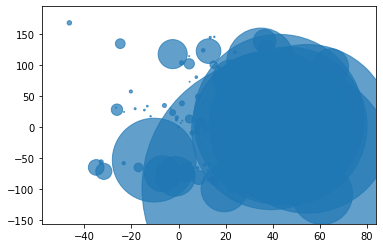

In [30]:
%%time

# Carreguem les dades del fitxer covid-19
data = pd.read_csv("data/COVID-19.csv")
# Sumem les defuncions per país
deaths_by_country = data.groupby(["countriesAndTerritories"])["deaths"].sum()
# Obtenim les coordenades, paral·lelitzant la feina amb 4 processos
countries_coords = get_coords_multiproc(deaths_by_country.index, num_processes=4) 
# Mostrem els resultats
plot_results(deaths_by_country, countries_coords)

1.2. Implementeu un programa *multithreaded* que generi l'*scatter plot* especificat. Per fer-ho, penseu quines tasques poden executar-se en diferents *threads*, i quines eines podeu fer servir per a evitar les interferències entre els *threads*.

En aquest cas, farem servir una implementació similar a la versió multiprocés:
* Mantindrem l'ús de la `JoinableQueue` per a coordinar les tasques dels diferents processos.
* No ens caldrà fer servir una cua de resultats, ja que els *threads* comparteixen variables. Per tant, crearem directament un diccionari de resultats `countries_coords`, i els *threads* hi escriuran directament els resultats que vagin obtenint. Farem servir un `lock` per a evitar interferències en l'actualització del diccionari.

In [31]:
def get_coords_thr(t_index, countries_q, lock, countries_coords):
    """
    Obté tasques (països dels quals en volem saber les coordenades)
        de la cua `countries_q`, realitza les tasques i desa els
        resultats al diccionari `countires_coords`.
    
    Finalitza quan ja no hi ha tasques a realitzar.
    """
    logging.info("[T{}]\tStarted".format(t_index))
    
    # Obtenim la primera tasca
    country = countries_q.get()
    # Mentre hi hagi tasques pendents, les realitzem
    while country:
        logging.info("[T{}]\tStarting to work on {}".format(t_index, country))    
        r = get_geo_cords(country)
        logging.info("[T{}]\tResult is {}".format(t_index, r))
        # Desem el resultat al diccionari de resultats, obtenint primer
        # el lock, i alliberant-lo quan acabem d'actualitzar el diccionari
        lock.acquire()
        countries_coords[country] = r
        lock.release()
        # Indiquem que hem finalitzat la tasca
        countries_q.task_done()
        # Obtenim la propera tasca
        country = countries_q.get()
    
    logging.info("[T{}]\tEnding".format(t_index))
    # Indiquem que hem finalitzat l'última tasca obtinguda de la cua 
    # (que era None, el marcador de final de tasques)
    countries_q.task_done()    
    logging.info("[T{}]\tThread ended".format(t_index))

    
def get_coords_multithr(countries, num_threads, lock, countries_coords):
    """
    Obté les coordenades geogràfiques d'una llista de països, fent servir
    `num_threads` threads per a l'obtenció de les dades.
    """

    # Creem la cua de tasques a realitzar
    countries_q = JoinableQueue()
    # Afegim els països a la cua de tasques
    for country in countries:
        countries_q.put(country)
        
    # Afegim un indicador de final de tasca al final de la llista
    # de tasques per a cada thread
    for _ in range(num_threads):
        countries_q.put(None)

    # Iniciem els `num_threads` fils amb la tasca d'obtenir
    # les coordenades i passant la cua com a paràmetre
    for i in range(num_threads):
        thread = Thread(target=get_coords_thr, args=(i, countries_q, lock, countries_coords))
        thread.start()

    # Esperem a que s'hagin completat totes les tasques
    logging.info("[M]\tWaiting to join threads")
    countries_q.join()
    logging.info("[M]\tThreads joined!")


[1754]	15:36:04 INFO: [T0]	Started
[1754]	15:36:04 INFO: [T0]	Starting to work on Afghanistan
[1754]	15:36:04 INFO: [T1]	Started
[1754]	15:36:04 INFO: [T1]	Starting to work on Albania
[1754]	15:36:04 INFO: [T2]	Started
[1754]	15:36:04 INFO: [T2]	Starting to work on Algeria
[1754]	15:36:04 INFO: [T3]	Started
[1754]	15:36:04 INFO: [M]	Waiting to join threads
[1754]	15:36:04 INFO: [T3]	Starting to work on Andorra
[1754]	15:36:04 INFO: [T0]	Result is (33.7680065, 66.2385139)
[1754]	15:36:04 INFO: [T0]	Starting to work on Angola
[1754]	15:36:04 INFO: [T2]	Result is (28.0000272, 2.9999825)
[1754]	15:36:04 INFO: [T2]	Starting to work on Anguilla
[1754]	15:36:04 INFO: [T3]	Result is (42.5407167, 1.5732033)
[1754]	15:36:04 INFO: [T3]	Starting to work on Antigua_and_Barbuda
[1754]	15:36:04 INFO: [T3]	Result is (17.05, -61.8)
[1754]	15:36:04 INFO: [T3]	Starting to work on Argentina
[1754]	15:36:05 INFO: [T0]	Result is (-11.8775768, 17.5691241)
[1754]	15:36:05 INFO: [T0]	Starting to work on Armeni

[1754]	15:36:12 INFO: [T2]	Result is (-51.75, -59.16667)
[1754]	15:36:12 INFO: [T2]	Starting to work on France
[1754]	15:36:12 INFO: [T1]	Result is (62.0, -7.0)
[1754]	15:36:12 INFO: [T1]	Starting to work on French_Polynesia
[1754]	15:36:12 INFO: [T0]	Result is (-18.1239696, 179.0122737)
[1754]	15:36:12 INFO: [T0]	Starting to work on Gabon
[1754]	15:36:12 INFO: [T1]	Result is (-15.0, -140.0)
[1754]	15:36:12 INFO: [T1]	Starting to work on Gambia
[1754]	15:36:12 INFO: [T3]	Result is (63.2467777, 25.9209164)
[1754]	15:36:12 INFO: [T3]	Starting to work on Georgia
[1754]	15:36:12 INFO: [T2]	Result is (46.603354, 1.8883335)
[1754]	15:36:12 INFO: [T2]	Starting to work on Germany
[1754]	15:36:12 INFO: [T1]	Result is (13.470062, -15.4900464)
[1754]	15:36:12 INFO: [T1]	Starting to work on Ghana
[1754]	15:36:12 INFO: [T0]	Result is (-0.8999695, 11.6899699)
[1754]	15:36:12 INFO: [T0]	Starting to work on Gibraltar
[1754]	15:36:12 INFO: [T3]	Result is (41.6809707, 44.0287382)
[1754]	15:36:12 INFO: [

[1754]	15:36:20 INFO: [T3]	Starting to work on Niger
[1754]	15:36:20 INFO: [T0]	Result is (52.5001698, 5.7480821)
[1754]	15:36:20 INFO: [T0]	Starting to work on Nigeria
[1754]	15:36:20 INFO: [T2]	Result is (12.6090157, -85.2936911)
[1754]	15:36:20 INFO: [T2]	Starting to work on North_Macedonia
[1754]	15:36:20 INFO: [T3]	Result is (17.7356214, 9.3238432)
[1754]	15:36:20 INFO: [T3]	Starting to work on Northern_Mariana_Islands
[1754]	15:36:20 INFO: [T0]	Result is (9.6000359, 7.9999721)
[1754]	15:36:20 INFO: [T0]	Starting to work on Norway
[1754]	15:36:20 INFO: [T1]	Result is (-46.4108596, 168.3516142)
[1754]	15:36:20 INFO: [T1]	Starting to work on Oman
[1754]	15:36:20 INFO: [T2]	Result is (41.66667, 21.75)
[1754]	15:36:20 INFO: [T2]	Starting to work on Pakistan
[1754]	15:36:20 INFO: [T3]	Result is (15.214, 145.756)
[1754]	15:36:20 INFO: [T3]	Starting to work on Palestine
[1754]	15:36:21 INFO: [T0]	Result is (64.5731537, 11.5280364)
[1754]	15:36:21 INFO: [T0]	Starting to work on Panama
[17

[1754]	15:36:27 INFO: [T3]	Result is (16.3471243, 47.8915271)
[1754]	15:36:27 INFO: [T3]	Ending
[1754]	15:36:27 INFO: [T3]	Thread ended
[1754]	15:36:27 INFO: [T0]	Result is (-18.4554963, 29.7468414)
[1754]	15:36:27 INFO: [T0]	Ending
[1754]	15:36:27 INFO: [T0]	Thread ended
[1754]	15:36:28 INFO: [T2]	Result is (-14.5186239, 27.5599164)
[1754]	15:36:28 INFO: [T2]	Ending
[1754]	15:36:28 INFO: [T2]	Thread ended
[1754]	15:36:28 INFO: [M]	Threads joined!
CPU times: user 1.9 s, sys: 3.23 s, total: 5.14 s
Wall time: 24.6 s


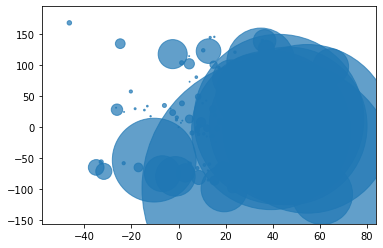

In [32]:
%%time

# Carreguem les dades del fitxer covid-19
data = pd.read_csv("data/COVID-19.csv")
# Sumem les defuncions per país
deaths_by_country = data.groupby(["countriesAndTerritories"])["deaths"].sum()
# Obtenim les coordenades, paral·lelitzant la feina amb 4 threads
lock = Lock()
countries_coords = {}
get_coords_multithr(deaths_by_country.index, 4, lock, countries_coords) 
# Mostrem els resultats
plot_results(deaths_by_country, countries_coords)

1.3. Reflexioneu sobre quina de les dues implementacions hauria de ser la més eficient per a resoldre el problema plantejat.

Experimentalment podem comprovar com el temps d'execució d'ambdues versions és molt similar (27.8 segons per a l'execució original del *notebook*). 

Conceptualment, la tasca que executem en els múltiples fils o processos és una tasca limitada per la xarxa (ja sigui per l'ample de banda de la nostra màquina o pel temps de resposta del servidor), i que requereix de molt poc càlcul de CPU. Per tant, tant l'execució paral·lela en diversos processos com la concurrent en una única CPU tenen un temps d'execució similar, limitada per la xarxa i no pas per la CPU. Filant molt prim, podríem dir que la versió *multithreaded* genera menys *overhead* (crear *threads* és més ràpid que no pas crear processos), però per a l'execució concreta que hem realitzat, això no arriba a tenir un impacte notable en el rendiment. També podríem dir que la versió multiprocés aprofita millor els recursos de la màquina (ja que executa, paral·lelament, diverses crides a la API), però de nou això no té un impacte significatiu, ja que el temps de càlcul de CPU que requereix aquesta aplicació és mínim.

# 5.- Bibliografia


## 5.1.- Bibliografia bàsica

La bibliografia bàsica d'aquesta unitat és el contingut explicat en el notebook (no és necessari consultar cap enllaç extern).


## 5.2.- Bibliografia addicional - Ampliació de coneixements

A la introducció d'aquesta unitat s'ha simplificat una mica el detall de com funciona la gestió de memòria en l'execució de programes, ja que no és l'objectiu principal d'aquest mòdul. Si esteu interessats en explorar en més detall què diferencia, a nivell de sistema operatiu, els *threads* dels processos, us recomanem que visiteu els enllaços següents ([1](https://www.youtube.com/watch?v=TRH2HupGkgI), [2](https://www.youtube.com/watch?v=PBb0NRvo96s), [3](https://www.youtube.com/watch?v=Dhf-DYO1K78), [4](https://www.youtube.com/watch?v=3WmNGc9qP0g), [5](https://www.youtube.com/watch?v=X668LfXObaM)).

En aquesta unitat s'ha presentat una introducció a la programació multiprocés i *multithread*, revisant algunes de les principals eines que ofereix Python en aquest context. Ara bé, això és només un petit tast! Si esteu interessats en conèixer altres eines per a realitzar programació concurrent i paral·lela en Python, us recomanem explorar altres eines de la llibreria [`multiprocessing`](https://docs.python.org/3/library/multiprocessing.html) com ara les *pools* de processos ([1](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool), [2](https://sebastianraschka.com/Articles/2014_multiprocessing.html)); l'ús de semàfors, events i *conditions* de de la llibreria [`threading`](https://docs.python.org/3.8/library/threading.html) ([1](https://hackernoon.com/synchronization-primitives-in-python-564f89fee732)); o la llibreria [asyncio](https://docs.python.org/3/library/asyncio.html). Si preferiu la consulta en format llibre (en comptes de diversos enllaços), us recomanem la lectura dels capítols 1 fins a 4 del llibre *Python Parallel Programming Cookbook*, de Giancarlo Zaccone. 

Hem vist com el mòdul multiprocessing ofereix un parell de classes, [`Value`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Value) i [`Array`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Array), que representen objectes que s'assignen en un espai de memòria compartida entre els diversos processos. [`Value`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Value) retorna un objecte de tipus `ctype`, que ofereix tipus de dades compatibles amb C. Podeu fer un cop d'ull als tipus de dades que ofereix en el [següent enllaç](https://docs.python.org/3/library/ctypes.html#fundamental-data-types).


Tot i que no era l'objectiu principal d'aquesta unitat, en aquest notebook hem fet servir el mòdul [`logging`](https://docs.python.org/3/library/logging.html) per a crear *logs* que registraven què estaven fent els diferents fils i processos en cada moment. Us recomanem la lectura dels tutorials oficials (tant el [bàsic](https://docs.python.org/3/howto/logging.html#logging-basic-tutorial) com el més [avançat](https://docs.python.org/3/howto/logging.html#logging-advanced-tutorial)) per tal de conèixer les funcionalitats d'aquest mòdul, que us poden ser útils no només per a seguir el flux d'execució de programes *multithread* o multiprocés, sinó també per a monitorejar qualsevol tipus de programa.